# <center>Organizaci&oacute;n de Datos</center>
#### <center>C&aacute;tedra Ing. Rodriguez, Juan Manuel </center>

## <center>TP1 </center>


### Exploracion Inicial

Se analiza cada variable, considerando los siguientes aspectos:
*  Tipo de variable
*   Variables Cuantitativas: calcular medidas de resumen: media, mediana, q1,
q3,moda
*   Variables Cualitativas mostrar cantidad de valores posibles, y frecuencias de cada
uno.
* Determinar variables irrelevantes en el análisis (Ids por ejemplo)
* Realizar un análisis gráfico de las distribuciones de las variables
* Analizar las correlaciones existentes entre las variables.

### Configuraciones iniciales

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.preprocessing as skp 

from sklearn.feature_extraction import FeatureHasher
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import (
    KBinsDiscretizer,
    LabelEncoder,
    MinMaxScaler,
    Normalizer,
    OneHotEncoder,
    OrdinalEncoder,
    PowerTransformer,
    RobustScaler,
    StandardScaler,
)


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.options.display.max_columns = None

Carga de datasets

In [2]:
import pandas as pd
from google.colab import files
files.upload()

Saving properati_argentina_2021.csv to properati_argentina_2021.csv


In [3]:
import pandas as pd
from google.colab import files
files.upload()

Saving properati_argentina_2021_decrip.csv to properati_argentina_2021_decrip.csv


In [3]:
df=pd.read_csv('./properati_argentina_2021.csv')

In [ ]:
df_descr=pd.read_csv('./properati_argentina_2021_decrip.csv')

Realizamos una copia del dataset sobre el cual vamos a trabajar para no alterar los datos originales

In [4]:
df_t=df.copy()

In [5]:
df_descr_t=df_descr.copy()

### Analisis general

Observamos los datos del dataset

In [5]:
df_t.head()

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
0,XZq2dFGxBiboHY3Bo/tqlw==,2021-09-09,2022-01-27,2021-09-09,-38.957632,-68.105443,Neuquén,NaN,NaN,NaN,NaN,Venta,Casa,6.0,NaN,NaN,206.0,NaN,NaN,Casa - Capital
1,8afoK+yMH/rnnlYiktwgNA==,2021-09-09,2021-10-23,2021-09-09,-34.888878,-56.092368,Montevideo,NaN,NaN,NaN,NaN,Venta,Casa,4.0,3.0,193.0,193.0,390000.0,USD,Casa - Malvín
2,iVaG5rBB47dd1Ya4BMXREA==,2021-09-09,2022-03-09,2021-09-09,-32.488717,-58.257499,Entre Ríos,NaN,NaN,NaN,NaN,Venta,Casa,NaN,NaN,110.0,45.0,47000.0,USD,Casa - Uruguay
3,QE1QVMWKAHWkd0qT0FtPWA==,2021-09-09,2022-01-27,2021-09-09,-34.900165,-54.808453,Maldonado,NaN,NaN,NaN,NaN,Venta,Casa,NaN,3.0,NaN,180.0,400000.0,USD,Casa - El Chorro
4,tJ5lSk7IysG/71OGhacNZA==,2021-09-09,2022-01-27,2021-09-09,-38.954528,-68.041862,Neuquén,NaN,NaN,NaN,NaN,Venta,PH,3.0,2.0,NaN,98.0,102000.0,USD,PH - Villa Farrell


In [ ]:
df_descr_t.head()

In [6]:
df_t.shape

(460154, 20)

In [23]:
df_descr_t.shape

(460154, 2)

Vemos si hay datos raros en el dataset properati

In [7]:
con_caracter_raro = df_t.astype('str').eq('-').any(0)
con_caracter_raro

id                          False
start_date                  False
end_date                    False
created_on                  False
latitud                     False
longitud                    False
place_l2                    False
place_l3                    False
place_l4                    False
place_l5                    False
place_l6                    False
operation                   False
property_type               False
property_rooms              False
property_bedrooms           False
property_surface_total      False
property_surface_covered    False
property_price              False
property_currency           False
property_title               True
dtype: bool

Veo si hay filas duplicadas

In [8]:
df_t[df_t.duplicated(keep=False)]

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title


In [9]:
size_antes = len(df_t)
df_f = df_t.drop_duplicates()
size_despues = len(df_f)
print(f'Se eliminaron: {size_antes-size_despues} filas duplicadas')

Se eliminaron: 0 filas duplicadas


Voy a filtrar el dataset considerando: 

*   Tipo vivienda (CASA,PH,DPTO)
*   Ubicacion: Capital federal
*   Tipo: Venta
*   Precio: USD





In [10]:
# df_f es un DataFrame filtrado por las condiciones descriptas anteriormente
df_f=df_t.copy()

condicion_tipo_casa=df_f['property_type']== "Casa"
condicion_tipo_ph=df_f['property_type']== "PH"
condicion_tipo_dpto=df_f['property_type']== "Departamento"
condicion_lugar=df_f['place_l2']== "Capital Federal"
condicion_moneda=df_f['property_currency']== "USD"
condicion_operacion=df_f['operation']=="Venta"

df_f=df_f[(condicion_tipo_casa | condicion_tipo_ph | condicion_tipo_dpto) & condicion_lugar & condicion_moneda & condicion_operacion ]


In [11]:
df_f.tail(100)

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
459833,fPwOb97HgvwTQXhWD390iA==,2021-01-05,2021-01-25,2021-01-05,-34.617889,-58.438636,Capital Federal,Caballito,NaN,NaN,NaN,Venta,Departamento,3.0,2.0,62.0,55.0,114999.0,USD,VENTA DEPTO 3 AMB.C/ BALCÓN CORRIDO EN LA MEJO...
459835,pPtdlDUtqhsW+kGbKFYsqQ==,2021-01-05,2021-01-08,2021-01-05,-34.617145,-58.445123,Capital Federal,Caballito,NaN,NaN,NaN,Venta,Departamento,3.0,2.0,78.0,63.0,160000.0,USD,DEPTO 3 AMB A ESTRENAR CON COCHERA !!
459837,vAAjKg2YvI9toono4+yetQ==,2021-01-05,9999-12-31,2021-01-05,-34.610226,-58.432263,Capital Federal,Caballito,NaN,NaN,NaN,Venta,Departamento,2.0,1.0,34.0,34.0,68000.0,USD,E. Acevedo 500 P 1° por escalera interno. Caba...
459838,nR8oQoRVNfxh5elhWtjnOQ==,2021-01-05,2021-01-25,2021-01-05,-34.609298,-58.434598,Capital Federal,Caballito,NaN,NaN,NaN,Venta,Departamento,4.0,3.0,107.0,100.0,279900.0,USD,Venta Departamento 4 ambientes con cochera - C...
459839,EhSpwNSexLKXCZBnSfTs3A==,2021-01-05,2021-06-05,2021-01-05,-34.617658,-58.435118,Capital Federal,Caballito,NaN,NaN,NaN,Venta,Departamento,4.0,4.0,162.0,155.0,397000.0,USD,Piso Exclusivo con Espectacular Vista al el Pa...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460072,v4f5Un9jO7hsD02MWLkKBQ==,2021-01-05,2022-09-02,2021-01-05,-34.603245,-58.489810,Capital Federal,Villa del Parque,NaN,NaN,NaN,Venta,Departamento,4.0,3.0,130.0,100.0,220000.0,USD,Espectacular 4 amb130m2 con Balcon Terraza!!!
460073,Aq/Z+XyS8FHbOOxed4xtTw==,2021-01-05,2021-02-17,2021-01-05,-34.614063,-58.482814,Capital Federal,Villa del Parque,NaN,NaN,NaN,Venta,Departamento,3.0,2.0,68.0,60.0,161000.0,USD,3 ambientes con cochera listo para habitar!
460074,Rmamz8v4Wkh5xF7PA59Jqw==,2021-01-05,2021-01-27,2021-01-05,-34.614175,-58.479062,Capital Federal,Villa del Parque,NaN,NaN,NaN,Venta,Departamento,1.0,1.0,51.0,30.0,75500.0,USD,VENTA MONOAMBIENTE CON PATIO SOL DE MAÑANA ///...
460075,7yl8Dfx5wobH21YdMU+Kgg==,2021-01-05,2021-01-27,2021-01-05,-34.614175,-58.479062,Capital Federal,Villa del Parque,NaN,NaN,NaN,Venta,Departamento,1.0,1.0,37.0,31.0,74500.0,USD,VENTA MONOAMBIENTE APAISADO y DIVISIBLE AL CF ...


In [12]:
df_f.shape

(94249, 20)

Suma de datos nulos por columna

In [13]:
print(df_f.isna().sum())

id                              0
start_date                      0
end_date                        0
created_on                      0
latitud                      3730
longitud                     3730
place_l2                        0
place_l3                      417
place_l4                    90606
place_l5                    94249
place_l6                    94249
operation                       0
property_type                   0
property_rooms               1044
property_bedrooms           10987
property_surface_total       4844
property_surface_covered     3354
property_price                  0
property_currency               0
property_title                  0
dtype: int64


In [14]:
columnas_eliminar_NANs=['id','place_l2','place_l5','place_l6','property_currency']
df_f.drop(columnas_eliminar_NANs, axis='columns', inplace=True)

In [15]:
df_f.head()

,start_date,end_date,created_on,latitud,longitud,place_l3,place_l4,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title
25,2021-09-09,2021-09-26,2021-09-09,NaN,NaN,NaN,NaN,Venta,Casa,4.0,3.0,171.0,133.0,210000.0,VENTA CASA LLAVE EN MANO - COSTA ESMERALDA
42,2021-09-09,2021-09-26,2021-09-09,-34.637319,-58.361124,Boca,NaN,Venta,Departamento,3.0,2.0,58.0,55.0,82900.0,VENTA TRES AMBIENTES LA BOCA PISO ALTO
43,2021-09-09,2021-09-28,2021-09-09,-34.628647,-58.361871,Boca,NaN,Venta,Departamento,4.0,3.0,70.0,70.0,99000.0,Departamento - 4 Ambientes - Catalinas Sur
49,2021-09-09,2022-01-05,2021-09-09,-34.610027,-58.401934,Once,NaN,Venta,Departamento,4.0,2.0,NaN,104.0,146000.0,Venta departamento 4 ambientes Once
51,2021-09-09,2022-03-09,2021-09-09,-34.631621,-58.416825,Boedo,NaN,Venta,PH,4.0,2.0,NaN,73.0,250000.0,PH - Boedo


## Variables

Tipos de variables de los datasets

In [16]:
df_f.dtypes

start_date                   object
end_date                     object
created_on                   object
latitud                     float64
longitud                    float64
place_l3                     object
place_l4                     object
operation                    object
property_type                object
property_rooms              float64
property_bedrooms           float64
property_surface_total      float64
property_surface_covered    float64
property_price              float64
property_title               object
dtype: object

## Variables cuantitativas

Veo los NaNs que hay por place_l3, Barrios

In [27]:
filas_totales=df_f.shape[0]
print(df_f.isna().sum()/filas_totales*100)

start_date                   0.000000
end_date                     0.000000
created_on                   0.000000
latitud                      3.794015
longitud                     3.794015
place_l3                     0.000000
place_l4                    96.117529
operation                    0.000000
property_type                0.000000
property_rooms               1.025237
property_bedrooms           11.571745
property_surface_total       5.086751
property_surface_covered     3.563816
property_price               0.000000
property_title               0.000000
dtype: float64


In [28]:
#Como el porcentaje de NaNs de place_l3 en relacion a las filas totales es del 0.44 ,eliminamos dichos registros
df_f = df_f[df_f['place_l3'].notna()]

In [29]:
filas_totales=df_f.shape[0]
print(df_f.isna().sum()/filas_totales*100)

start_date                   0.000000
end_date                     0.000000
created_on                   0.000000
latitud                      3.794015
longitud                     3.794015
place_l3                     0.000000
place_l4                    96.117529
operation                    0.000000
property_type                0.000000
property_rooms               1.025237
property_bedrooms           11.571745
property_surface_total       5.086751
property_surface_covered     3.563816
property_price               0.000000
property_title               0.000000
dtype: float64


In [30]:
df_f.shape

(93832, 15)

Calculamos Media, Mediana,Modo, Q1 y Q3 para el feature Precio

In [31]:
df_f['property_price'].mean() 

226466.8802753858

In [32]:
df_f['property_price'].median() 

144000.0

In [33]:
df_f['property_price'].mode() 

0    110000.0
dtype: float64

In [34]:
#Cuartiles
Q1_precio=np.quantile(df_f.property_price,0.25)
Q3_precio=np.quantile(df_f.property_price,0.75)

#Rango intercuartil
IQR_precio=Q3_precio-Q1_precio

#Limite inferior Outliers
out_inf=Q1_precio-1.5*IQR_precio
out_sup=Q3_precio+1.5*IQR_precio
print(out_inf)
print(out_sup)

-119500.0
452500.0


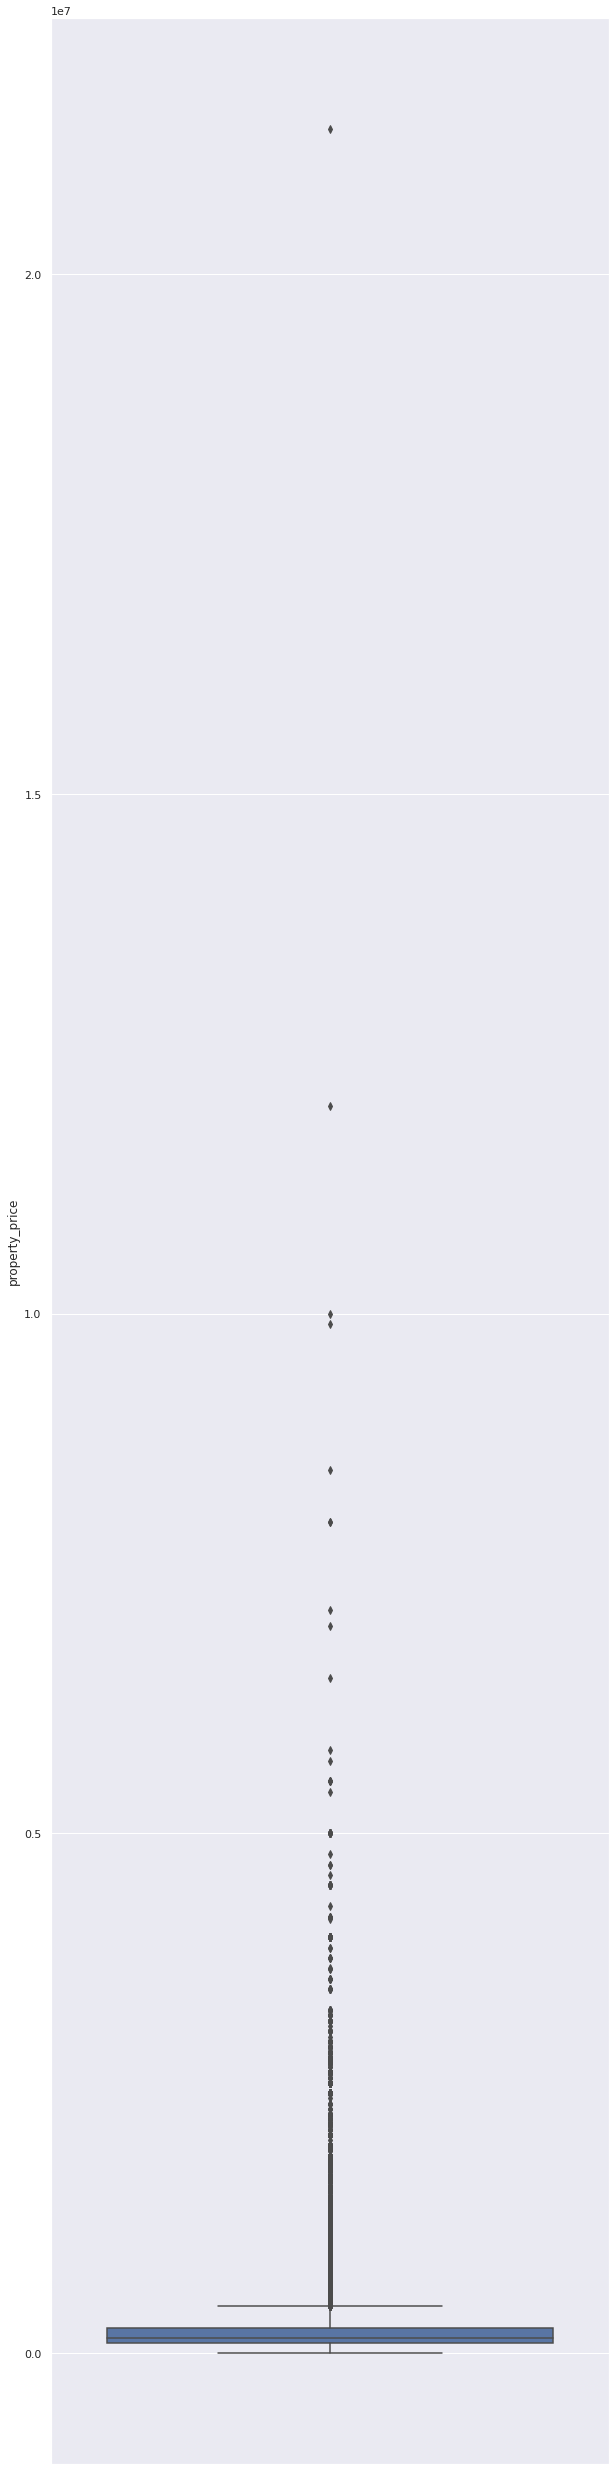

In [21]:
sns.set(rc={"figure.figsize":(10, 45)})
sns.boxplot(y=df_f.property_price)
plt.show()

Verificacion de valores atipicos

In [35]:
#Outliers
outlier=df_f[df_f['property_price']>2500000]
outlier

,start_date,end_date,created_on,latitud,longitud,place_l3,place_l4,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title
410,2021-09-09,2021-09-10,2021-09-09,-34.576741,-58.404830,Palermo,Palermo Chico,Venta,Departamento,NaN,4.0,400.0,NaN,2700000.0,Departamento - Palermo Chico
411,2021-09-09,2021-09-09,2021-09-09,-34.576741,-58.404830,Palermo,Palermo Chico,Venta,Departamento,NaN,4.0,400.0,NaN,2700000.0,Departamento - Palermo Chico
1140,2021-09-09,2022-01-27,2021-09-09,-34.605781,-58.376705,San Nicolás,NaN,Venta,Departamento,NaN,NaN,10500.0,10500.0,9900000.0,EDIFICIO A TERMINAR DE 900M2- EXCELENTE UBICAC...
4804,2021-09-20,2021-10-23,2021-09-20,-34.577484,-58.405751,Palermo,Palermo Chico,Venta,Departamento,5.0,3.0,535.0,220.0,2800000.0,VENTA con RENTA hasta Feb 2020 TORRES DE GELL...
4826,2021-09-20,2021-10-24,2021-09-20,-34.567172,-58.430634,Palermo,NaN,Venta,Departamento,5.0,4.0,390.0,390.0,2900000.0,VENTA Torre MARIO R. ALVAREZ piso de máxima ca...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445602,2021-05-20,2021-05-20,2021-05-20,-34.608246,-58.363794,Puerto Madero,NaN,Venta,Departamento,7.0,4.0,540.0,360.0,3200000.0,PENTHOUSE 2 PISCINAS PRIVADAS EN PUERTO MADER...
446888,2021-05-22,2021-06-05,2021-05-22,-34.590923,-58.384214,Recoleta,NaN,Venta,Departamento,9.0,5.0,430.0,430.0,2800000.0,VENTA increible piso con vista a la Plaza Pell...
457782,2021-05-08,2021-06-05,2021-05-08,-34.581524,-58.403588,Palermo,NaN,Venta,Departamento,10.0,6.0,520.0,500.0,3300000.0,Venta Departamento Palermo
458809,2021-01-05,2022-06-11,2021-01-05,NaN,NaN,Palermo,Palermo Chico,Venta,Casa,NaN,4.0,405.0,405.0,3200000.0,Casa en venta en palermo chico


In [36]:
print(df_f['property_price'].describe())

count    9.383200e+04
mean     2.264669e+05
std      3.190497e+05
min      5.000000e+03
25%      9.500000e+04
50%      1.440000e+05
75%      2.380000e+05
max      2.140000e+07
Name: property_price, dtype: float64


Vemos la relacion entre algunos features

In [37]:
pd.crosstab(df_f['place_l3'],df_f['property_type'])

property_type,Casa,Departamento,PH
place_l3,,,
Abasto,5,221,5
Agronomía,28,116,91
Almagro,37,3695,349
Balvanera,23,2347,183
Barracas,87,964,195
Barrio Norte,22,2909,44
Belgrano,242,8423,233
Boca,26,287,52
Boedo,82,868,287


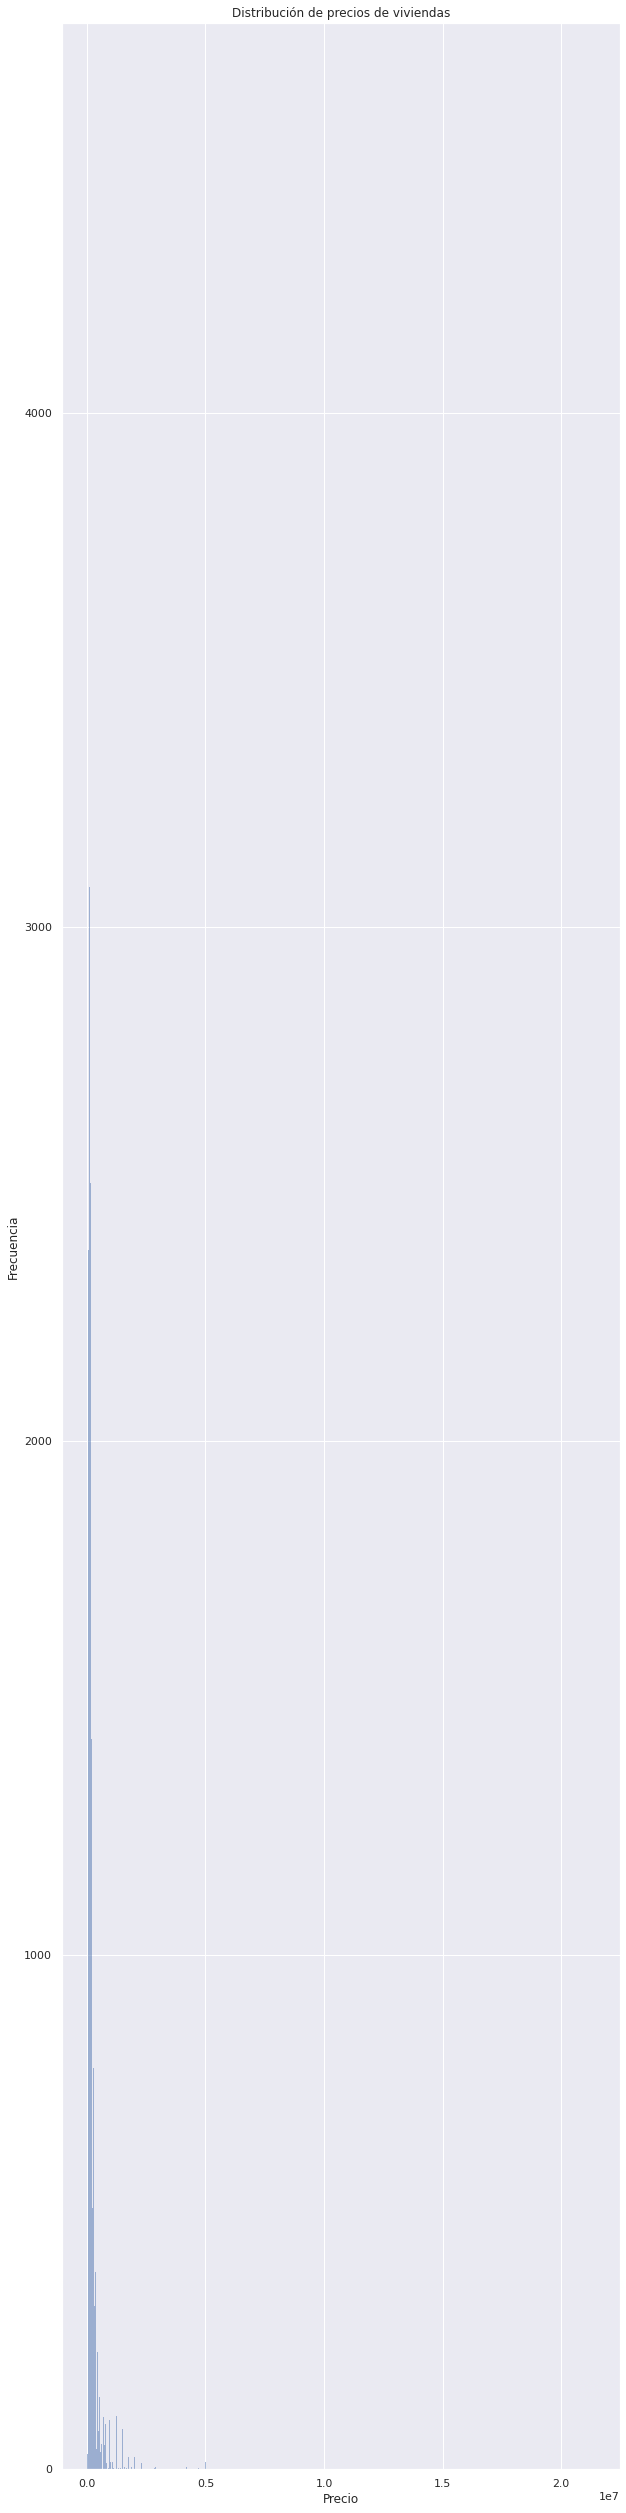

In [39]:
#Histograma de los precios
sns.set(rc={"figure.figsize":(10, 45)})
sns_hist=sns.histplot(data=df_f['property_price'], alpha = 0.5).set(title="Distribución de precios de viviendas",xlabel="Precio",ylabel="Frecuencia")

Veo la matriz de correlacion entre los features

In [45]:
#Calculo la correlación
matriz_corr=df_f.corr()
matriz_corr

,latitud,longitud,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price
latitud,1.000000,-0.140067,-0.031599,-0.033539,0.008633,0.002433,0.149062
longitud,-0.140067,1.000000,0.012021,0.018148,0.002094,0.003562,0.123224
property_rooms,-0.031599,0.012021,1.000000,0.871808,0.066745,0.075911,0.489265
property_bedrooms,-0.033539,0.018148,0.871808,1.000000,0.068462,0.074732,0.425445
property_surface_total,0.008633,0.002094,0.066745,0.068462,1.000000,0.617301,0.086853
property_surface_covered,0.002433,0.003562,0.075911,0.074732,0.617301,1.000000,0.056107
property_price,0.149062,0.123224,0.489265,0.425445,0.086853,0.056107,1.000000


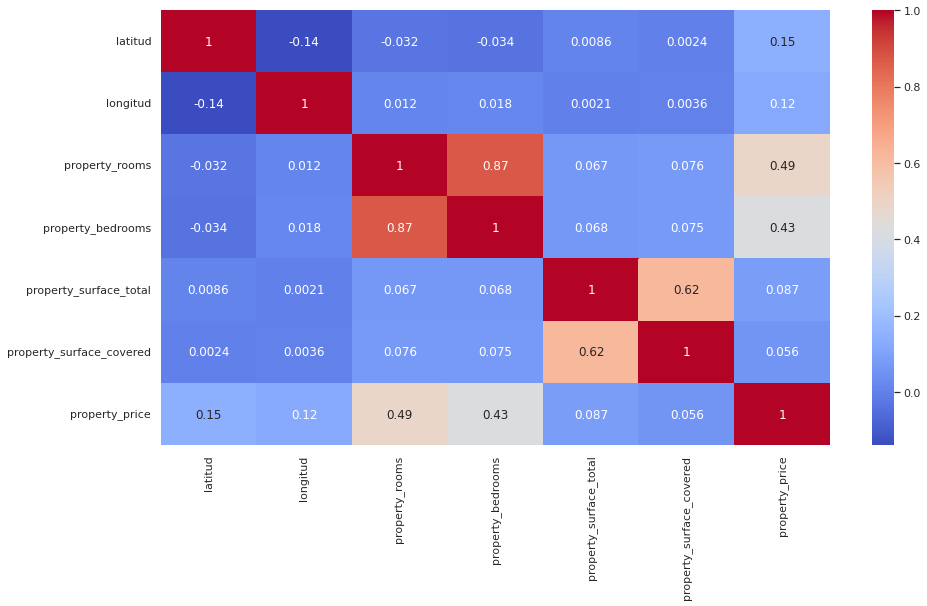

In [46]:
#Grafico la matriz de correlación en un Heatmap

plt.figure(figsize = (15,8))
sns.heatmap(matriz_corr, annot = True, cmap='coolwarm')

Se puede observar el el Precio de las Viviendas tiene una correlacion positiva media con el numero de ambientes 

## Variables cualitativas

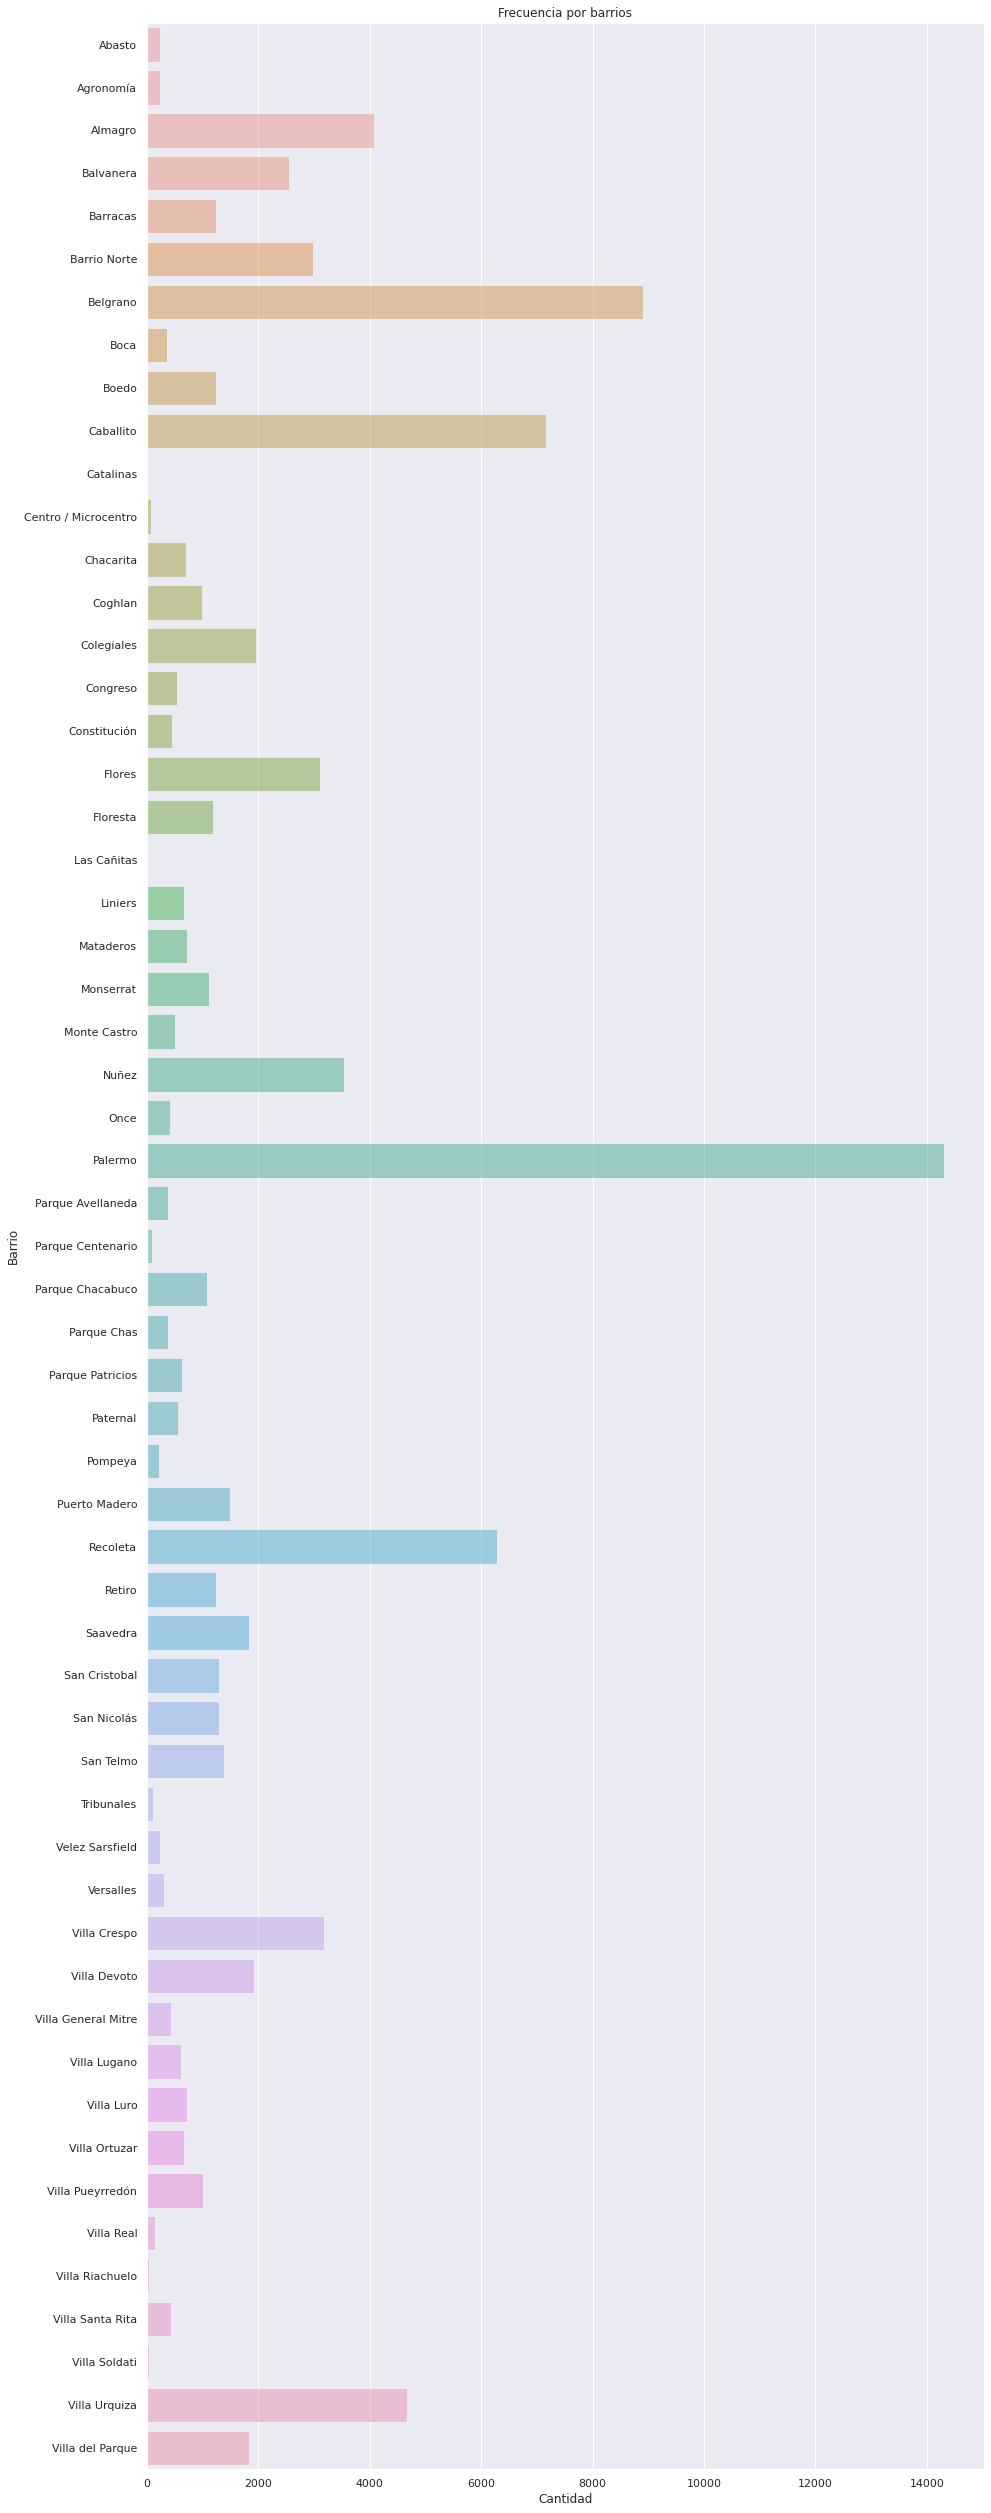

In [40]:
#Seaborn
ds_agrupado_Pclass=df_f.groupby(['place_l3']).count()  #Calculo la frecuencia de cada barrio

eje_y = ds_agrupado_Pclass.index.tolist()  
eje_x = ds_agrupado_Pclass['property_price'].tolist() 
sns.set(rc={"figure.figsize":(15, 45)})
sns_bar_plot=sns.barplot(x=eje_x, y=eje_y, data=ds_agrupado_Pclass ,alpha=0.5, orient="h").set(title="Frecuencia por barrios",xlabel='Cantidad',ylabel='Barrio')


## Gráficos

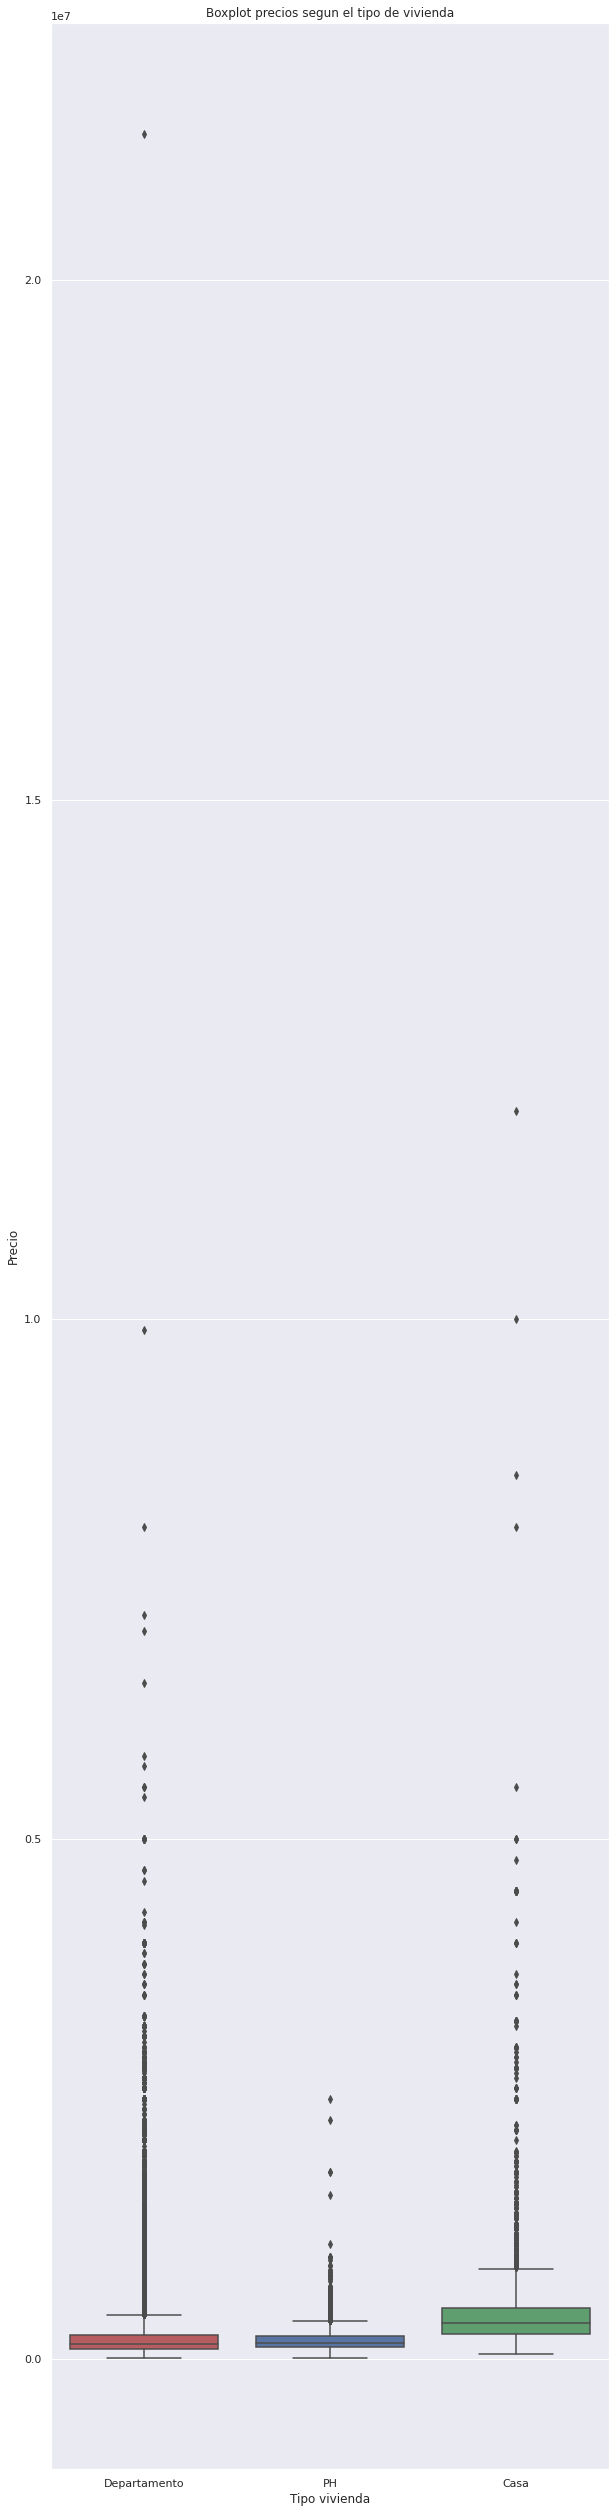

In [41]:
#Viviendas segun precios
sns.set(rc={"figure.figsize":(10, 45)})
sns_boxplot_fare_pclass=sns.boxplot(x="property_type",y="property_price", data=df_f, palette=["r","b", "g"]).set(title="Boxplot precios segun el tipo de vivienda",xlabel='Tipo vivienda',ylabel='Precio')

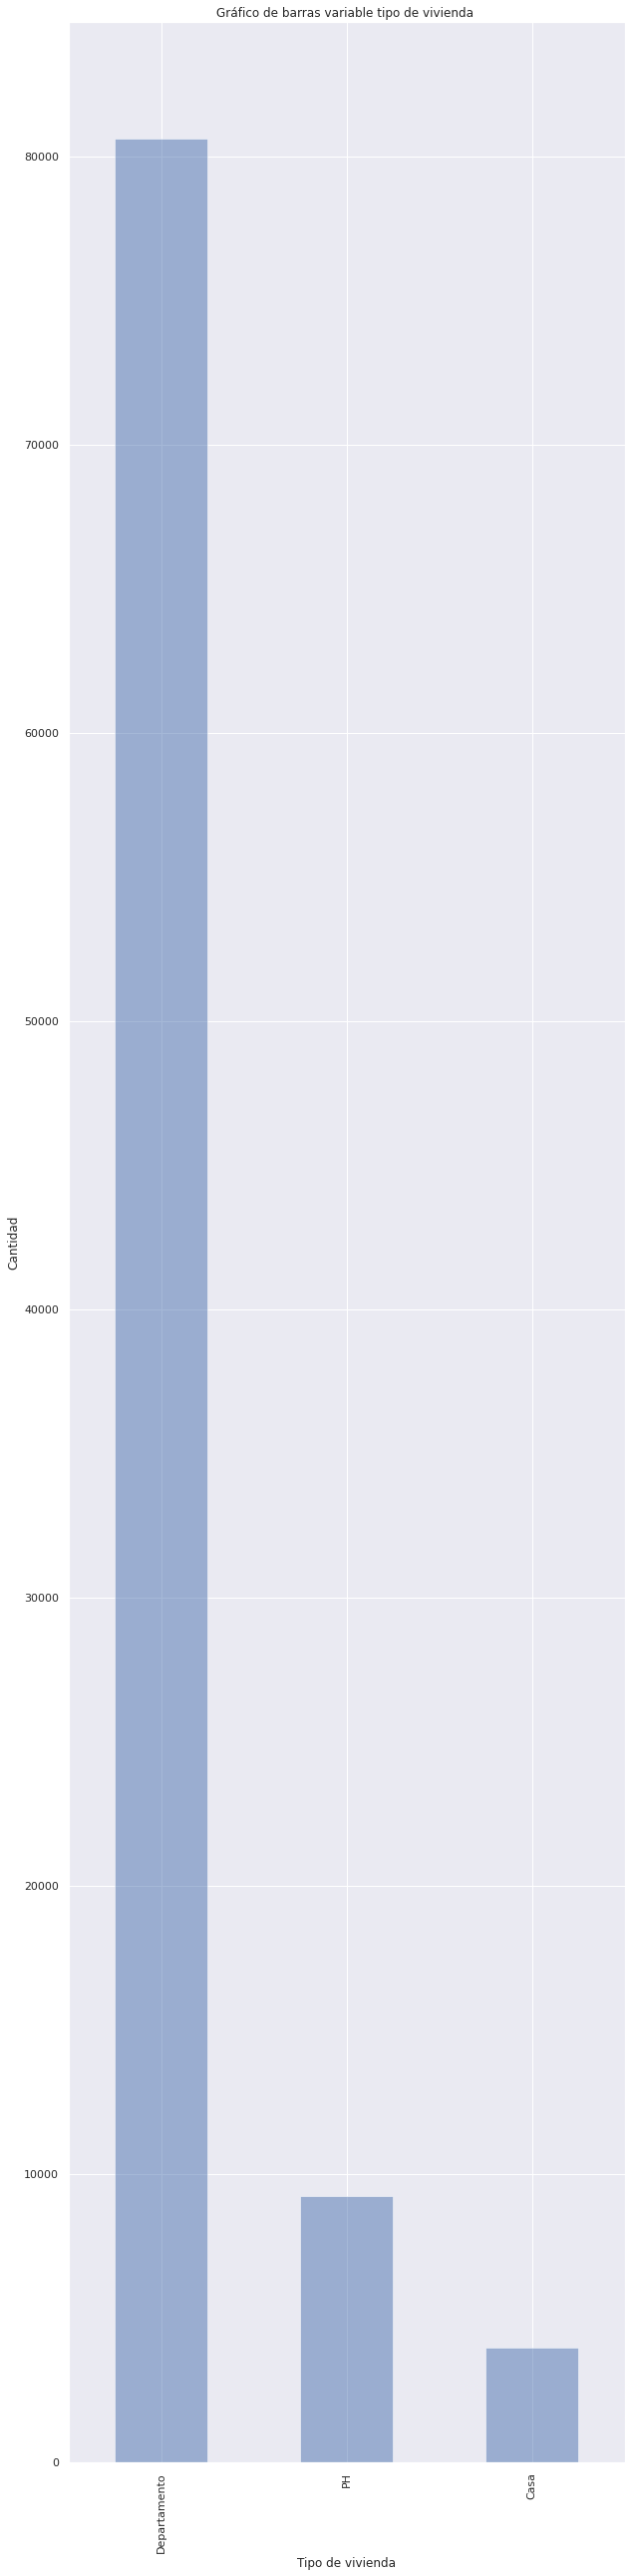

In [42]:
#Gráfico de barras

grf_ds=df_f['property_type'].value_counts().plot.bar(alpha=0.5 , title="Gráfico de barras variable tipo de vivienda " , xlabel="Tipo de vivienda" , ylabel="Cantidad")

In [50]:
#Analizo los casos para Palermo
is_Palermo = df_f.loc[:, 'place_l3'] == 'Palermo'
is_Palermo=(df_f.loc[:, 'property_rooms'] < 4)
is_Palermo=(df_f.loc[:, 'property_price'] > 999999)
df_Palermo = df_f.loc[is_Palermo]
df_Palermo.tail(1000)

,start_date,end_date,created_on,latitud,longitud,place_l3,place_l4,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title
243113,2021-02-11,2021-03-03,2021-02-11,-34.572411,-58.420593,Palermo,NaN,Venta,Departamento,8.0,4.0,450.0,450.0,2600000.0,VENTA TRIPLEX !!!!! Excelente vista en edifici...
243127,2021-02-11,2021-03-03,2021-02-11,NaN,NaN,Palermo,NaN,Venta,Departamento,6.0,3.0,298.0,298.0,1500000.0,VENTA semipiso 298 m2 RECICLADO en 3 dormitori...
243130,2021-02-11,2021-03-03,2021-02-11,-34.581030,-58.404719,Palermo,Palermo Chico,Venta,Departamento,6.0,3.0,325.0,325.0,2200000.0,VENTA Triplex sobre Libertador con regia vista...
243151,2021-02-11,2021-03-03,2021-02-11,-34.567198,-58.430706,Palermo,NaN,Venta,Departamento,5.0,3.0,350.0,350.0,2100000.0,VENTA increible DUPLEX RECICLADO con excelente...
243152,2021-02-11,2021-03-03,2021-02-11,NaN,NaN,Palermo,NaN,Venta,Departamento,6.0,4.0,390.0,390.0,2700000.0,RETASADO VENTA increible RECICLADO piso 390 m2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459724,2021-01-05,2021-10-16,2021-01-05,-34.587991,-58.389017,Recoleta,NaN,Venta,Departamento,8.0,3.0,285.0,272.0,1250000.0,Departamento de excelente categoria en venta e...
459729,2021-01-05,2022-09-15,2021-01-05,-34.587588,-58.389527,Recoleta,NaN,Venta,Departamento,6.0,3.0,271.0,265.0,1250000.0,Departamento - Recoleta
459755,2021-01-05,2022-06-12,2021-01-05,-34.590653,-58.384325,Recoleta,NaN,Venta,Departamento,8.0,5.0,431.0,415.0,2800000.0,Departamento de excelente calidad con 5 dormit...
459764,2021-01-05,9999-12-31,2021-01-05,-34.586441,-58.387889,Recoleta,NaN,Venta,Departamento,8.0,4.0,383.0,383.0,1700000.0,Departamento frances con 2 cocheras en venta e...


In [70]:
df_Palermo.shape

(14308, 15)

In [71]:
#Vemos cuantps subbarrios de Palermo tienen NaNs
filas_totales=df_Palermo.shape[0]
print(df_Palermo.isna().sum()/filas_totales*100)

start_date                   0.000000
end_date                     0.000000
created_on                   0.000000
latitud                      6.339111
longitud                     6.339111
place_l3                     0.000000
place_l4                    74.538720
operation                    0.000000
property_type                0.000000
property_rooms               1.055354
property_bedrooms           13.516914
property_surface_total       5.863852
property_surface_covered     4.773553
property_price               0.000000
property_title               0.000000
dtype: float64


In [ ]:
#Outliers
outlier=df_Palermo[df_Palermo['property_rooms']>6]
outlier

In [81]:
#Outliers
outlier=df_Palermo[df_Palermo['property_price']>1000000]
outlier

,start_date,end_date,created_on,latitud,longitud,place_l3,place_l4,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title
410,2021-09-09,2021-09-10,2021-09-09,-34.576741,-58.404830,Palermo,Palermo Chico,Venta,Departamento,NaN,4.0,400.0,NaN,2700000.0,Departamento - Palermo Chico
411,2021-09-09,2021-09-09,2021-09-09,-34.576741,-58.404830,Palermo,Palermo Chico,Venta,Departamento,NaN,4.0,400.0,NaN,2700000.0,Departamento - Palermo Chico
438,2021-09-09,2022-03-06,2021-09-09,-34.575053,-58.407958,Palermo,Palermo Chico,Venta,Departamento,4.0,3.0,282.0,256.0,2250000.0,Torre Vignoli 282 metros . 3 suites . 2 cocheras
448,2021-09-09,2022-01-27,2021-09-09,-34.577855,-58.408796,Palermo,Palermo Chico,Venta,Departamento,5.0,4.0,304.0,294.0,1200000.0,Departamento de 5 ambientes con dependencia -...
4804,2021-09-20,2021-10-23,2021-09-20,-34.577484,-58.405751,Palermo,Palermo Chico,Venta,Departamento,5.0,3.0,535.0,220.0,2800000.0,VENTA con RENTA hasta Feb 2020 TORRES DE GELL...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458809,2021-01-05,2022-06-11,2021-01-05,NaN,NaN,Palermo,Palermo Chico,Venta,Casa,NaN,4.0,405.0,405.0,3200000.0,Casa en venta en palermo chico
459361,2021-01-05,2022-06-12,2021-01-05,-34.577771,-58.408918,Palermo,NaN,Venta,Departamento,7.0,4.0,351.0,291.0,1700000.0,"Impecable piso alto con vista, sol, 2 cochera..."
459398,2021-01-05,2022-06-11,2021-01-05,-34.577324,-58.403823,Palermo,Palermo Chico,Venta,Departamento,7.0,4.0,365.0,365.0,1380000.0,Departamento de 4 dormitorios con cochera en v...
459426,2021-01-05,9999-12-31,2021-01-05,-34.579447,-58.407507,Palermo,NaN,Venta,Departamento,6.0,3.0,265.0,265.0,1250000.0,Departamento de 3 dormitorios en venta en Palermo
